# EDA

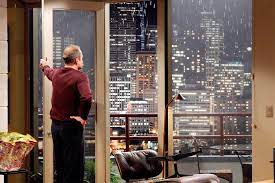

In [55]:
import warnings

warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from matplotlib.ticker import PercentFormatter
plt.rcParams.update({ "figure.figsize" : (8, 5),"axes.facecolor" : "white", "axes.edgecolor":  "black"})
plt.rcParams["figure.facecolor"]= "w"
pd.plotting.register_matplotlib_converters()
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [56]:
#reading the dataframe
data = pd.read_csv('King_County_House_prices_dataset.csv')
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.000,3,1.000,1180,5650,1.000,NaN,0.000,...,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,12/9/2014,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,...,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,2/25/2015,180000.000,2,1.000,770,10000,1.000,0.000,0.000,...,6,770,0.0,1933,NaN,98028,47.738,-122.233,2720,8062
3,2487200875,12/9/2014,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,...,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,2/18/2015,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,...,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.000,3,2.500,1530,1131,3.000,0.000,0.000,...,8,1530,0.0,2009,0.000,98103,47.699,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.000,4,2.500,2310,5813,2.000,0.000,0.000,...,8,2310,0.0,2014,0.000,98146,47.511,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.000,2,0.750,1020,1350,2.000,0.000,0.000,...,7,1020,0.0,2009,0.000,98144,47.594,-122.299,1020,2007
21595,291310100,1/16/2015,400000.000,3,2.500,1600,2388,2.000,NaN,0.000,...,8,1600,0.0,2004,0.000,98027,47.535,-122.069,1410,1287


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [58]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [59]:
data.duplicated().value_counts()

False    21597
Name: count, dtype: int64

In [6]:
type(data['date'][0])

str

In [60]:
#converting the date column to time and date type
data['date'] = pd.to_datetime(data['date'], format='%m/%d/%Y')
type(data['date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     19221 non-null  float64       
 9   view           21534 non-null  float64       
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  object        
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

In [62]:
#to know how many NaN do we have in the dataframe
data.isna().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [63]:
#fill the NaN values with real values
#it is hard to get more info about those columns so 0 is the best choice
data.fillna({'view' : 0, 'waterfront' : 0, 'yr_renovated' : 0}, inplace=True)

In [64]:
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [65]:
data['view'].value_counts()

view
0.000    19485
2.000      957
3.000      508
1.000      330
4.000      317
Name: count, dtype: int64

In [66]:
data['waterfront'].value_counts()

waterfront
0.000    21451
1.000      146
Name: count, dtype: int64

In [67]:
data['yr_renovated'].value_counts()

yr_renovated
0.000       20853
2014.000       73
2013.000       31
2003.000       31
2007.000       30
            ...  
1951.000        1
1953.000        1
1946.000        1
1976.000        1
1948.000        1
Name: count, Length: 70, dtype: int64

In [68]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.000,3,1.000,1180,5650,1.000,0.000,0.000,...,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,2014-12-09,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,...,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,2015-02-25,180000.000,2,1.000,770,10000,1.000,0.000,0.000,...,6,770,0.0,1933,0.000,98028,47.738,-122.233,2720,8062
3,2487200875,2014-12-09,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,...,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,2015-02-18,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,...,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.000,3,2.500,1530,1131,3.000,0.000,0.000,...,8,1530,0.0,2009,0.000,98103,47.699,-122.346,1530,1509
21593,6600060120,2015-02-23,400000.000,4,2.500,2310,5813,2.000,0.000,0.000,...,8,2310,0.0,2014,0.000,98146,47.511,-122.362,1830,7200
21594,1523300141,2014-06-23,402101.000,2,0.750,1020,1350,2.000,0.000,0.000,...,7,1020,0.0,2009,0.000,98144,47.594,-122.299,1020,2007
21595,291310100,2015-01-16,400000.000,3,2.500,1600,2388,2.000,0.000,0.000,...,8,1600,0.0,2004,0.000,98027,47.535,-122.069,1410,1287


In [69]:
#there is a problem in this column and i need to fix it first then convert it to float
data['sqft_basement'].unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

In [70]:
# to know how many values in this column = ? 
data.query('sqft_basement == "?"').count()

id               454
date             454
price            454
bedrooms         454
bathrooms        454
sqft_living      454
sqft_lot         454
floors           454
waterfront       454
view             454
condition        454
grade            454
sqft_above       454
sqft_basement    454
yr_built         454
yr_renovated     454
zipcode          454
lat              454
long             454
sqft_living15    454
sqft_lot15       454
dtype: int64

In [71]:
# replacing the ? with NaN - and here we need to import Numpy before
data['sqft_basement'] = data['sqft_basement'].replace('?',np.NaN)

In [72]:
#check that we don't have '?'anymore
data.query('sqft_basement == "?"').count()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [73]:
#to know how many NaN we have now 
data['sqft_basement'].isna().sum()

454

In [74]:
data.fillna({'sqft_basement' : 0}, inplace=True)
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [75]:
data['zipcode'].nunique()

70

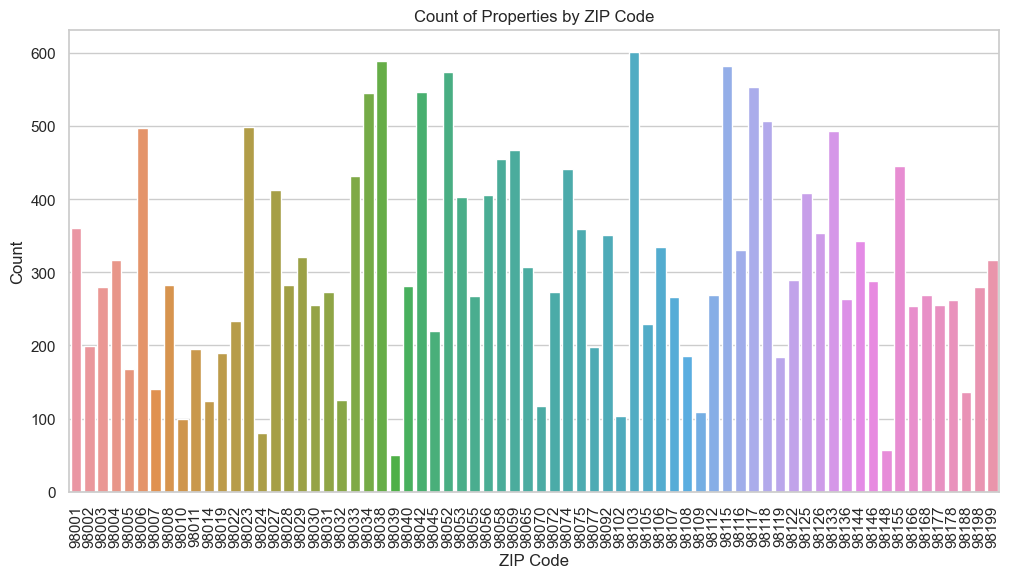

In [76]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x=data['zipcode'].value_counts().index, y=data['zipcode'].value_counts())
plt.title('Count of Properties by ZIP Code')
plt.xlabel('ZIP Code')
plt.ylabel('Count')
plt.xticks(rotation=90) 
plt.show()

In [77]:
data['zipcode'].describe()

count   21597.000
mean    98077.952
std        53.513
min     98001.000
25%     98033.000
50%     98065.000
75%     98118.000
max     98199.000
Name: zipcode, dtype: float64

In [78]:
data['zipcode'].value_counts()

zipcode
98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     80
98148     57
98039     50
Name: count, Length: 70, dtype: int64

In [79]:
data['bedrooms'].value_counts()

bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

In [80]:
data['grade'].value_counts()

grade
7     8974
8     6065
9     2615
6     2038
10    1134
11     399
5      242
12      89
4       27
13      13
3        1
Name: count, dtype: int64

In [81]:
data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.000,3,1.000,1180,5650,1.000,0.000,0.000,...,7,1180,0.0,1955,0.000,98178,47.511,-122.257,1340,5650
1,6414100192,2014-12-09,538000.000,3,2.250,2570,7242,2.000,0.000,0.000,...,7,2170,400.0,1951,1991.000,98125,47.721,-122.319,1690,7639
2,5631500400,2015-02-25,180000.000,2,1.000,770,10000,1.000,0.000,0.000,...,6,770,0.0,1933,0.000,98028,47.738,-122.233,2720,8062
3,2487200875,2014-12-09,604000.000,4,3.000,1960,5000,1.000,0.000,0.000,...,7,1050,910.0,1965,0.000,98136,47.521,-122.393,1360,5000
4,1954400510,2015-02-18,510000.000,3,2.000,1680,8080,1.000,0.000,0.000,...,8,1680,0.0,1987,0.000,98074,47.617,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.000,3,2.500,1530,1131,3.000,0.000,0.000,...,8,1530,0.0,2009,0.000,98103,47.699,-122.346,1530,1509
21593,6600060120,2015-02-23,400000.000,4,2.500,2310,5813,2.000,0.000,0.000,...,8,2310,0.0,2014,0.000,98146,47.511,-122.362,1830,7200
21594,1523300141,2014-06-23,402101.000,2,0.750,1020,1350,2.000,0.000,0.000,...,7,1020,0.0,2009,0.000,98144,47.594,-122.299,1020,2007
21595,291310100,2015-01-16,400000.000,3,2.500,1600,2388,2.000,0.000,0.000,...,8,1600,0.0,2004,0.000,98027,47.535,-122.069,1410,1287


In [82]:
mah = data[['id', 'date', 'price', 'bedrooms', 'grade', 'zipcode', 'lat', 'long']]
mah

,id,date,price,bedrooms,grade,zipcode,lat,long
0,7129300520,2014-10-13,221900.000,3,7,98178,47.511,-122.257
1,6414100192,2014-12-09,538000.000,3,7,98125,47.721,-122.319
2,5631500400,2015-02-25,180000.000,2,6,98028,47.738,-122.233
3,2487200875,2014-12-09,604000.000,4,7,98136,47.521,-122.393
4,1954400510,2015-02-18,510000.000,3,8,98074,47.617,-122.045
...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.000,3,8,98103,47.699,-122.346
21593,6600060120,2015-02-23,400000.000,4,8,98146,47.511,-122.362
21594,1523300141,2014-06-23,402101.000,2,7,98144,47.594,-122.299
21595,291310100,2015-01-16,400000.000,3,8,98027,47.535,-122.069


Text(0.5, 1.0, 'Distripution of houses')

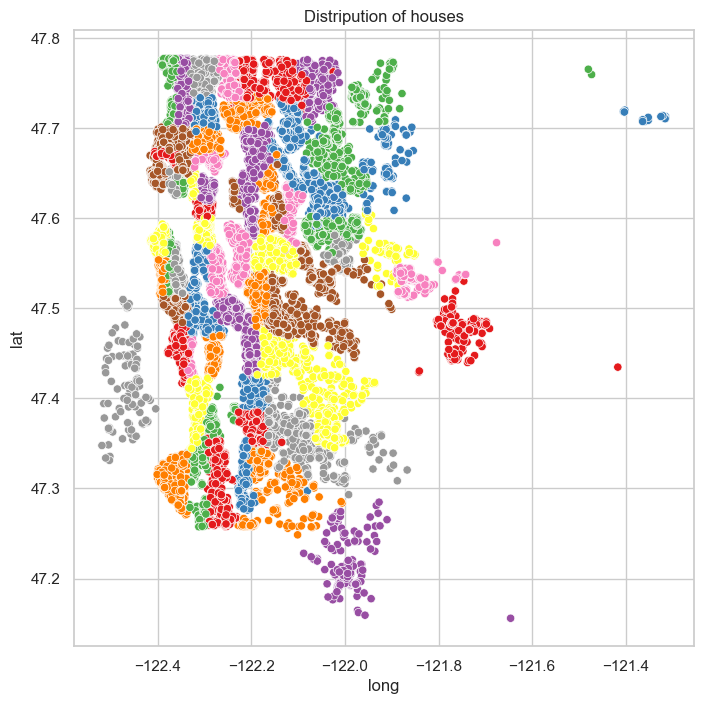

In [83]:
fig = plt.figure(figsize=(8,8))
maps_fig = sns.scatterplot(data=data, x='long', y='lat', hue='zipcode', palette='Set1', legend=False);
plt.title('Distripution of houses')

In [84]:
data['lat'].nunique()

5033

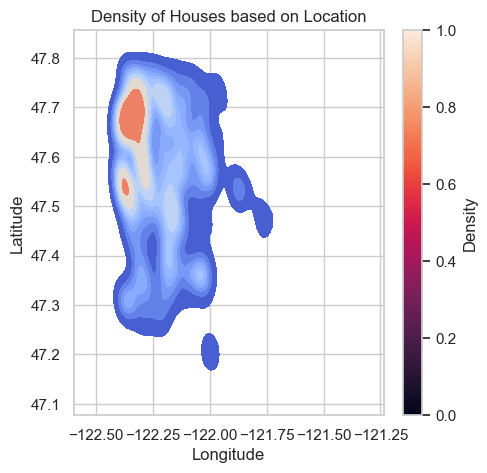

In [85]:
#plot the density population 
plt.figure(figsize=(5, 5))
kde = sns.kdeplot(x=data['long'], y=data['lat'], cmap='coolwarm', fill=True)

plt.title('Density of Houses based on Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

cbar = plt.colorbar(kde.collections[0])
cbar.set_label('Density')

plt.show()

In [86]:
mah['year'] = mah.date.dt.year
mah['month'] = mah.date.dt.month
mah

,id,date,price,bedrooms,grade,zipcode,lat,long,year,month
0,7129300520,2014-10-13,221900.000,3,7,98178,47.511,-122.257,2014,10
1,6414100192,2014-12-09,538000.000,3,7,98125,47.721,-122.319,2014,12
2,5631500400,2015-02-25,180000.000,2,6,98028,47.738,-122.233,2015,2
3,2487200875,2014-12-09,604000.000,4,7,98136,47.521,-122.393,2014,12
4,1954400510,2015-02-18,510000.000,3,8,98074,47.617,-122.045,2015,2
...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.000,3,8,98103,47.699,-122.346,2014,5
21593,6600060120,2015-02-23,400000.000,4,8,98146,47.511,-122.362,2015,2
21594,1523300141,2014-06-23,402101.000,2,7,98144,47.594,-122.299,2014,6
21595,291310100,2015-01-16,400000.000,3,8,98027,47.535,-122.069,2015,1


In [87]:
mah.year.value_counts()

year
2014    14622
2015     6975
Name: count, dtype: int64

In [88]:
column_to_analyze = 'zipcode'  

# Calculate counts of properties for each ZIP code
zipcode_counts = mah[column_to_analyze].value_counts()

# Define bins based on counts
num_categories = 5  # You can adjust the number of categories as needed
lively_level = pd.qcut(zipcode_counts, q=num_categories, labels=['v.low', 'low', 'medium', 'high', 'v.high'])

# Map the lively_level categories to the original DataFrame
mah['liveliness'] = mah[column_to_analyze].map(lively_level)

# Display the resulting DataFrame with the 'lively_level' column
print(mah[['zipcode', 'liveliness']])

       zipcode liveliness
0        98178        low
1        98125       high
2        98028     medium
3        98136        low
4        98074       high
...        ...        ...
21592    98103     v.high
21593    98146     medium
21594    98144       high
21595    98027       high
21596    98144       high

[21597 rows x 2 columns]


In [90]:
mah.head(5)

,id,date,price,bedrooms,grade,zipcode,lat,long,year,month,liveliness
0,7129300520,2014-10-13,221900.000,3,7,98178,47.511,-122.257,2014,10,low
1,6414100192,2014-12-09,538000.000,3,7,98125,47.721,-122.319,2014,12,high
2,5631500400,2015-02-25,180000.000,2,6,98028,47.738,-122.233,2015,2,medium
3,2487200875,2014-12-09,604000.000,4,7,98136,47.521,-122.393,2014,12,low
4,1954400510,2015-02-18,510000.000,3,8,98074,47.617,-122.045,2015,2,high


In [91]:
price_level = pd.cut(mah.price, 5, labels=['v.low', 'low', 'average', 'high', 'v.high'])
price_level = lively_level.rename('price_level')
price_level

zipcode
98103    v.high
98038    v.high
98115    v.high
98052    v.high
98117    v.high
          ...  
98102     v.low
98010     v.low
98024     v.low
98148     v.low
98039     v.low
Name: price_level, Length: 70, dtype: category
Categories (5, object): ['v.low' < 'low' < 'medium' < 'high' < 'v.high']

In [38]:
# mah = pd.merge(mah, lively_level, on='zipcode')
# mah

In [93]:


column_to_analyze_price = 'price'

# Calculate quantiles for the 'price' column
price_quantiles = pd.qcut(mah[column_to_analyze_price], q=5, labels=['v.low', 'low', 'average', 'expensive', 'v.expensive'])

# Map the quantile categories to the original DataFrame
mah['price_level'] = price_quantiles
mah.head(5)


,id,date,price,bedrooms,grade,zipcode,lat,long,year,month,liveliness,price_level
0,7129300520,2014-10-13,221900.000,3,7,98178,47.511,-122.257,2014,10,low,v.low
1,6414100192,2014-12-09,538000.000,3,7,98125,47.721,-122.319,2014,12,high,expensive
2,5631500400,2015-02-25,180000.000,2,6,98028,47.738,-122.233,2015,2,medium,v.low
3,2487200875,2014-12-09,604000.000,4,7,98136,47.521,-122.393,2014,12,low,expensive
4,1954400510,2015-02-18,510000.000,3,8,98074,47.617,-122.045,2015,2,high,average


In [94]:
mah.year.value_counts()

year
2014    14622
2015     6975
Name: count, dtype: int64

In [95]:
mah.month.value_counts()

month
5     2414
4     2229
7     2211
6     2178
8     1939
10    1876
3     1875
9     1771
12    1470
11    1409
2     1247
1      978
Name: count, dtype: int64

In [96]:
# # mah = pd.merge(mah, price_level, on='zipcode')
# # mah
# price_level = pd.cut(mah['price'], 5, labels=['v.low', 'low', 'average', 'expensive', 'v.expensive'])

# # Add the 'price_level' column to the DataFrame
# mah['price_level'] = price_level
# mah

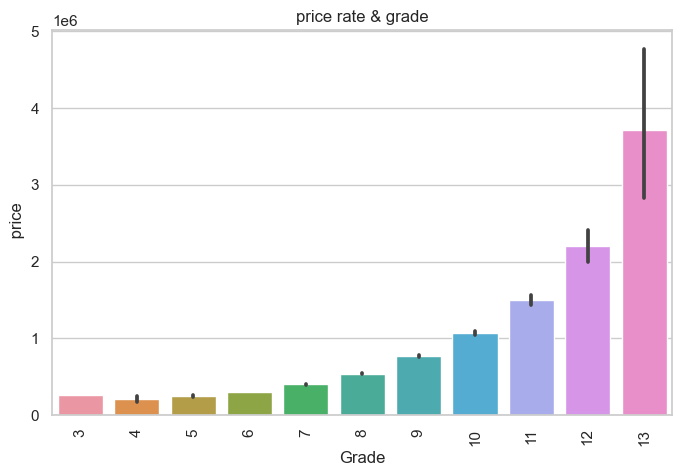

In [97]:
sns.set(style="whitegrid")
#plt.figure(figsize=(12, 6))
sns.barplot(x=mah['grade'], y=mah['price'], data=mah )
plt.title('price rate & grade')
plt.xlabel('Grade')
plt.ylabel(' price')
plt.xticks(rotation=90) 
plt.show()

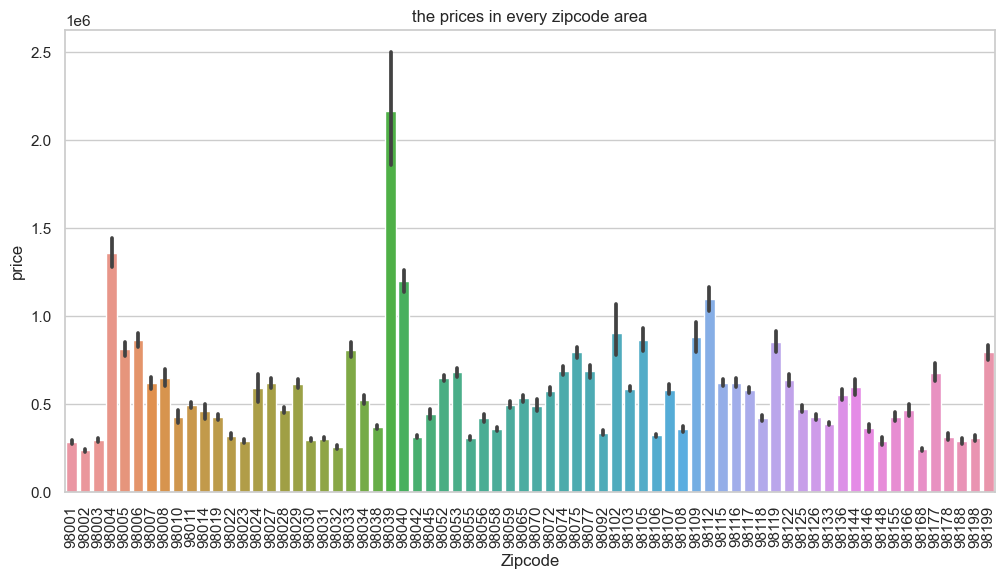

In [98]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.barplot(x=mah['zipcode'], y=mah['price'], data=mah)
plt.title('the prices in every zipcode area')
plt.xlabel('Zipcode')
plt.ylabel('price')
plt.xticks(rotation=90) 
plt.show()

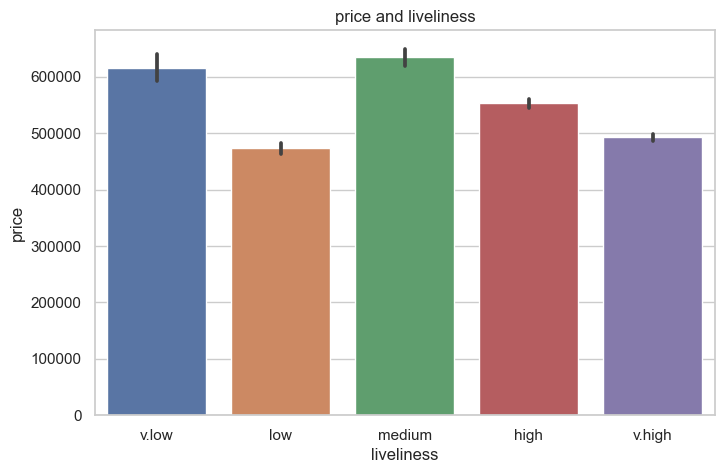

In [99]:
sns.set(style="whitegrid")
#plt.figure(figsize=(12, 6))
sns.barplot(x=mah['liveliness'], y=mah['price'], data=mah)
plt.title('price and liveliness')
plt.xlabel('liveliness')
plt.ylabel('price')
#plt.xticks(rotation=90) 
plt.show()

array([[<Axes: title={'center': 'price'}>]], dtype=object)

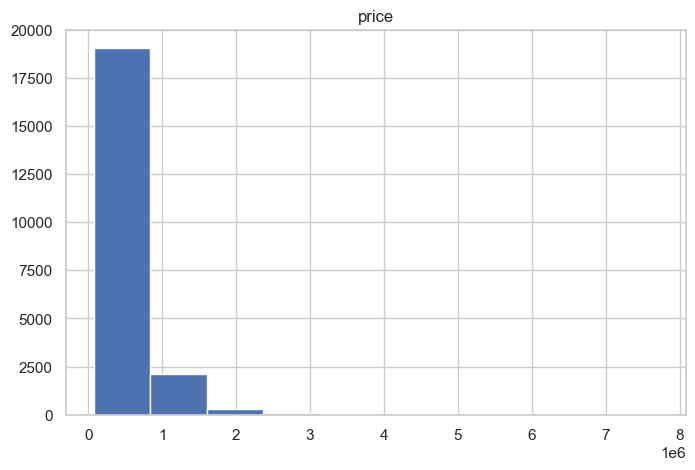

In [100]:
mah.hist(column="price")

<Axes: >

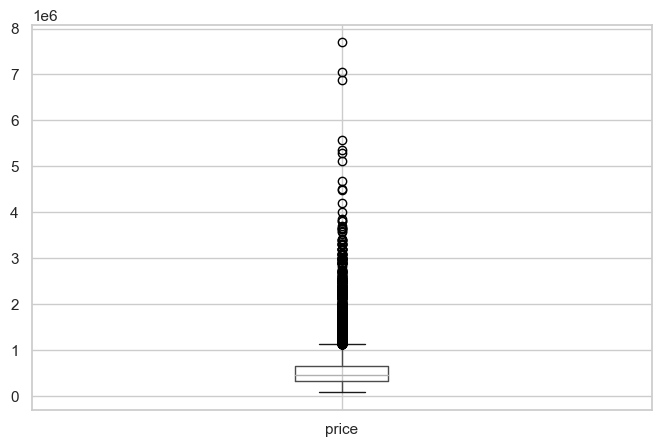

In [101]:
mah.boxplot(column="price")

In [102]:
mah.price.describe()

count     21597.000
mean     540296.574
std      367368.140
min       78000.000
25%      322000.000
50%      450000.000
75%      645000.000
max     7700000.000
Name: price, dtype: float64

# Hypothesis
- The liveliness of a zipcode increases with the greater number of houses in that area.
- Each zipcode area experiences its peak in housing sales at different times of the year
- House prices tend to rise in areas with a higher level of liveliness

# Hypothesis testing
`1- The liveliness of a zipcode increases with the greater number of houses in that area.`

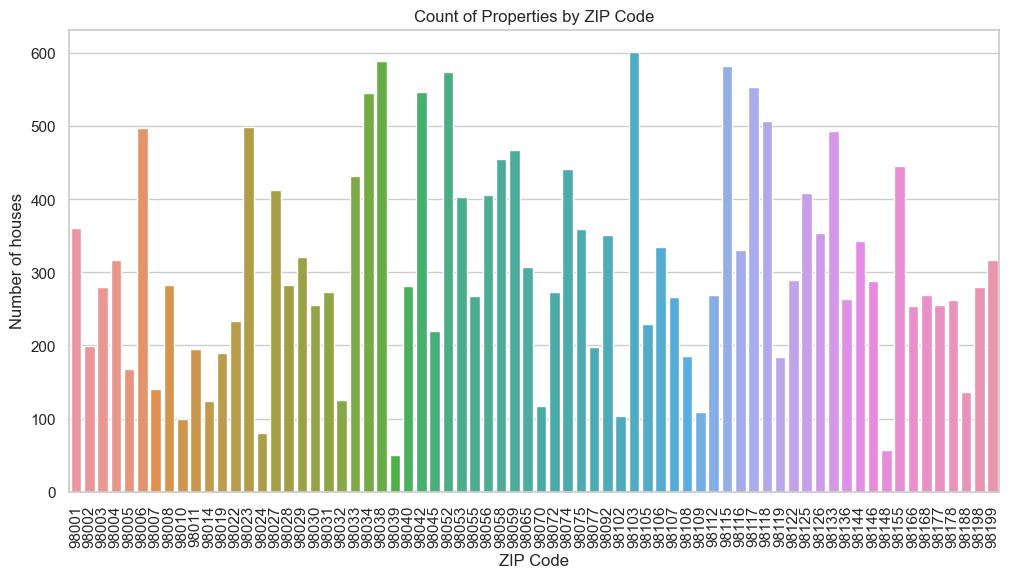

In [103]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
sns.countplot(x=data['zipcode'], data= data)
plt.title('Count of Properties by ZIP Code')
plt.xlabel('ZIP Code')
plt.ylabel('Number of houses')
plt.xticks(rotation=90) 
plt.show()

In [104]:
mah

,id,date,price,bedrooms,grade,zipcode,lat,long,year,month,liveliness,price_level
0,7129300520,2014-10-13,221900.000,3,7,98178,47.511,-122.257,2014,10,low,v.low
1,6414100192,2014-12-09,538000.000,3,7,98125,47.721,-122.319,2014,12,high,expensive
2,5631500400,2015-02-25,180000.000,2,6,98028,47.738,-122.233,2015,2,medium,v.low
3,2487200875,2014-12-09,604000.000,4,7,98136,47.521,-122.393,2014,12,low,expensive
4,1954400510,2015-02-18,510000.000,3,8,98074,47.617,-122.045,2015,2,high,average
...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,2014-05-21,360000.000,3,8,98103,47.699,-122.346,2014,5,v.high,low
21593,6600060120,2015-02-23,400000.000,4,8,98146,47.511,-122.362,2015,2,medium,average
21594,1523300141,2014-06-23,402101.000,2,7,98144,47.594,-122.299,2014,6,high,average
21595,291310100,2015-01-16,400000.000,3,8,98027,47.535,-122.069,2015,1,high,average


<Axes: xlabel='liveliness', ylabel='count'>

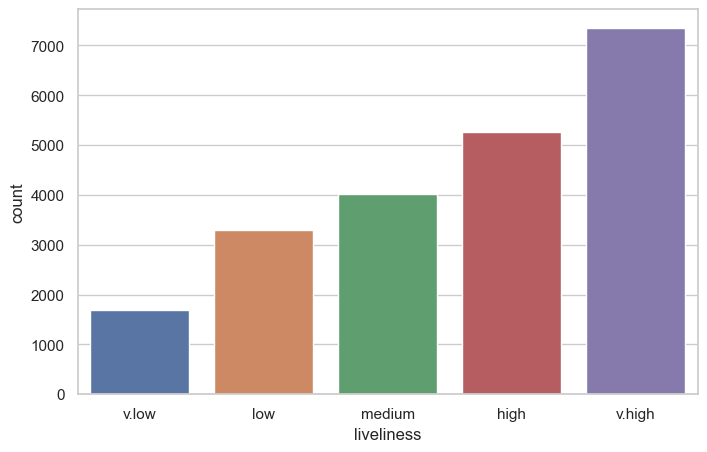

In [105]:
sns.set(style="whitegrid")
sns.countplot(data= mah, x=mah['liveliness'])

In [107]:
mah.liveliness.value_counts()

liveliness
v.high    7359
high      5257
medium    4012
low       3288
v.low     1681
Name: count, dtype: int64

`2 - Each zipcode area experiences its peak in housing sales at different times of the year`


<Figure size 1200x600 with 0 Axes>

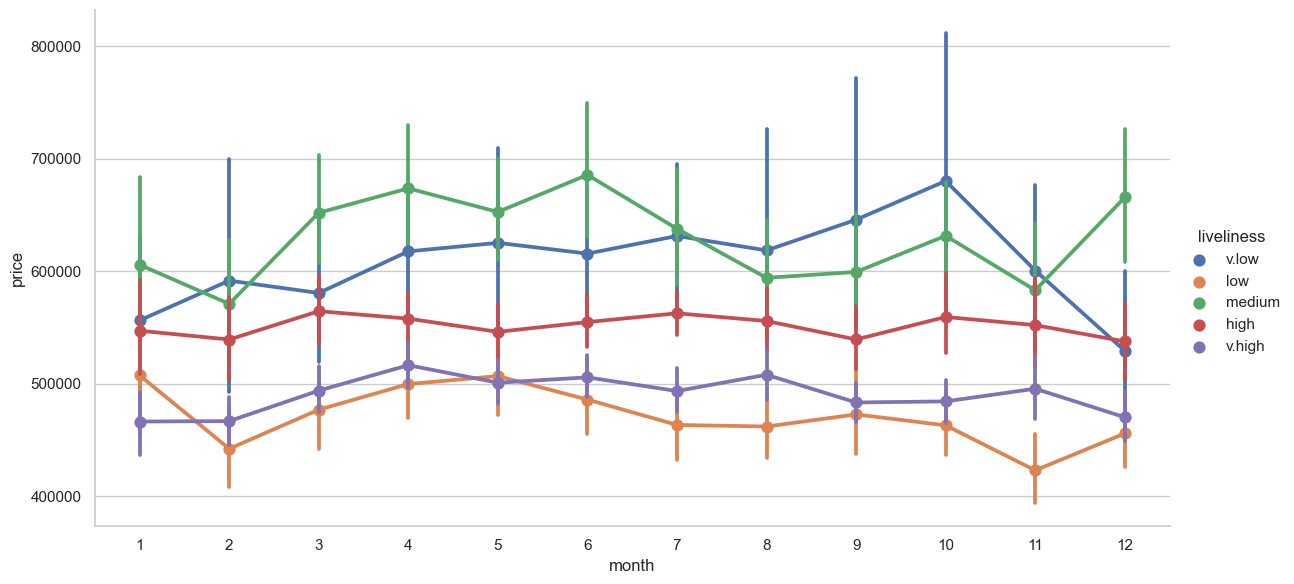

In [108]:
plt.figure(figsize=(12, 6))
sns.catplot(x='month', y='price', hue='liveliness', data=mah, kind='point', height=6, aspect=2)


<Axes: xlabel='year', ylabel='price'>

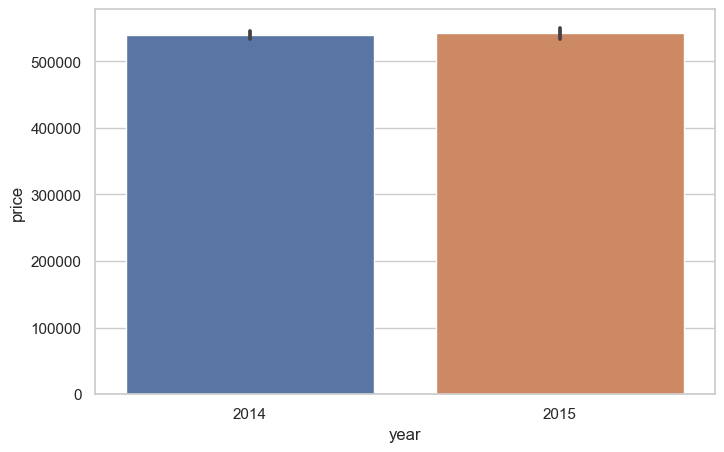

In [109]:
sns.barplot(x=mah['year'], y=mah['price'], data=mah)

Text(0.5, 1.0, 'Monthly Housing Prices')

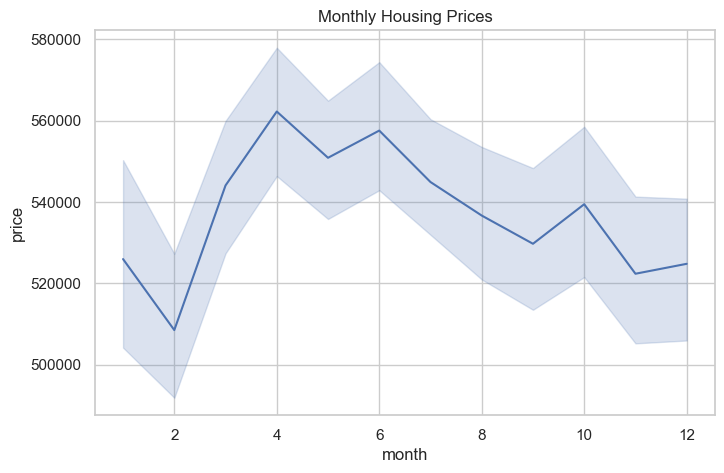

In [110]:
sns.lineplot(x=mah['month'], y=mah['price'], data=mah)
plt.title('Monthly Housing Prices')

In [111]:
jad = mah[(mah['liveliness'] == "high") | (mah['liveliness'] == "v.high")]
jad

,id,date,price,bedrooms,grade,zipcode,lat,long,year,month,liveliness,price_level
1,6414100192,2014-12-09,538000.000,3,7,98125,47.721,-122.319,2014,12,high,expensive
4,1954400510,2015-02-18,510000.000,3,8,98074,47.617,-122.045,2015,2,high,average
5,7237550310,2014-05-12,1230000.000,4,11,98053,47.656,-122.005,2014,5,high,v.expensive
9,3793500160,2015-03-12,323000.000,3,7,98038,47.368,-122.031,2015,3,v.high,low
11,9212900260,2014-05-27,468000.000,2,7,98115,47.690,-122.292,2014,5,v.high,average
...,...,...,...,...,...,...,...,...,...,...,...,...
21591,2997800021,2015-02-19,475000.000,3,8,98116,47.577,-122.409,2015,2,high,average
21592,263000018,2014-05-21,360000.000,3,8,98103,47.699,-122.346,2014,5,v.high,low
21594,1523300141,2014-06-23,402101.000,2,7,98144,47.594,-122.299,2014,6,high,average
21595,291310100,2015-01-16,400000.000,3,8,98027,47.535,-122.069,2015,1,high,average


Text(0.5, 1.0, 'Monthly Housing Prices in High and Very High Liveliness Zip Code Areas')

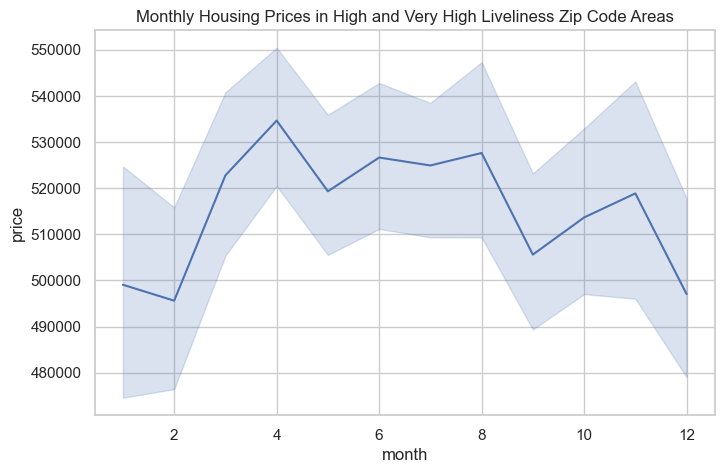

In [118]:
sns.lineplot(x=jad['month'], y=jad['price'], data=jad)
plt.title('Monthly Housing Prices in Areas with High and Very High Liveliness Zip Codes')

recommendation 
feb, jan, dec, sep,

`3 - House prices tend to rise in areas with a higher level of liveliness`


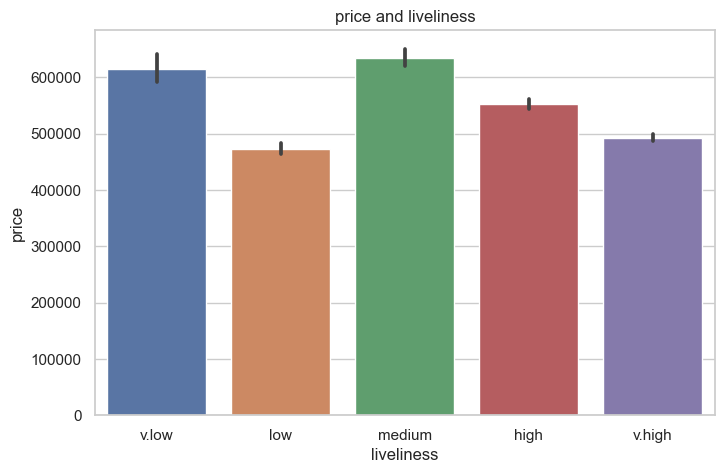

In [113]:
sns.set(style="whitegrid")
#plt.figure(figsize=(12, 6))
sns.barplot(x=mah['liveliness'], y=mah['price'], data=mah)
plt.title('price and liveliness')
plt.xlabel('liveliness')
plt.ylabel('price')
#plt.xticks(rotation=90) 
plt.show()

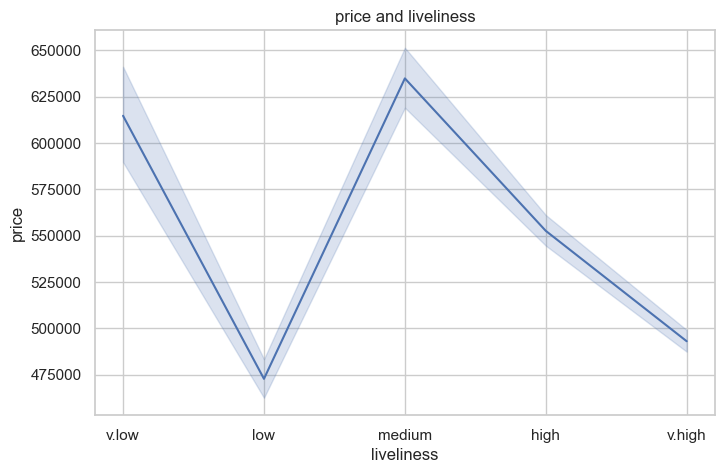

In [114]:
sns.set(style="whitegrid")
#plt.figure(figsize=(12, 6))
sns.lineplot(x=mah['liveliness'], y=mah['price'], data=mah)
plt.title('price and liveliness')
plt.xlabel('liveliness')
plt.ylabel('price')
#plt.xticks(rotation=90) 
plt.show()

`4 - The higher the grade the higher the price`

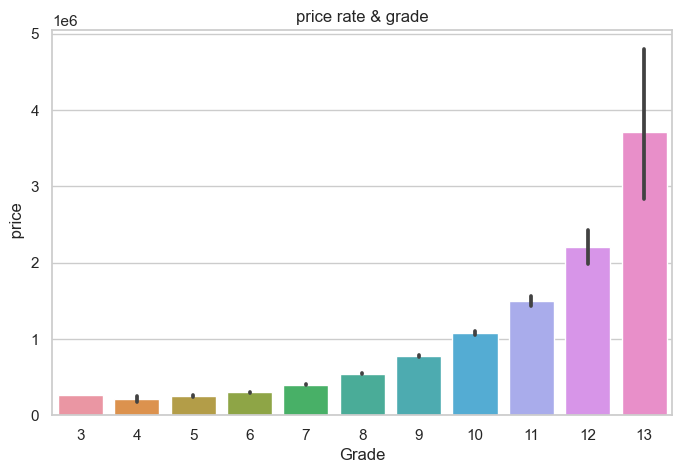

In [115]:
sns.set(style="whitegrid")
#plt.figure(figsize=(12, 6))
sns.barplot(x=mah['grade'], y=mah['price'], data=mah )
plt.title('price rate & grade')
plt.xlabel('Grade')
plt.ylabel(' price')
plt.show()

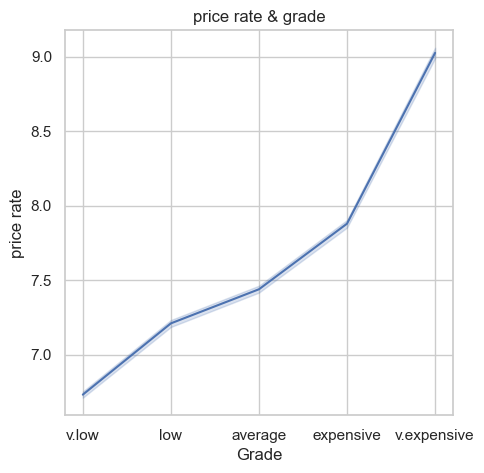

In [116]:
sns.set(style="whitegrid")
plt.figure(figsize=(5, 5))
sns.lineplot(x=mah['price_level'], y=mah['grade'], data=mah )
plt.title('price rate & grade')
plt.xlabel('Grade')
plt.ylabel('price rate')
plt.show()

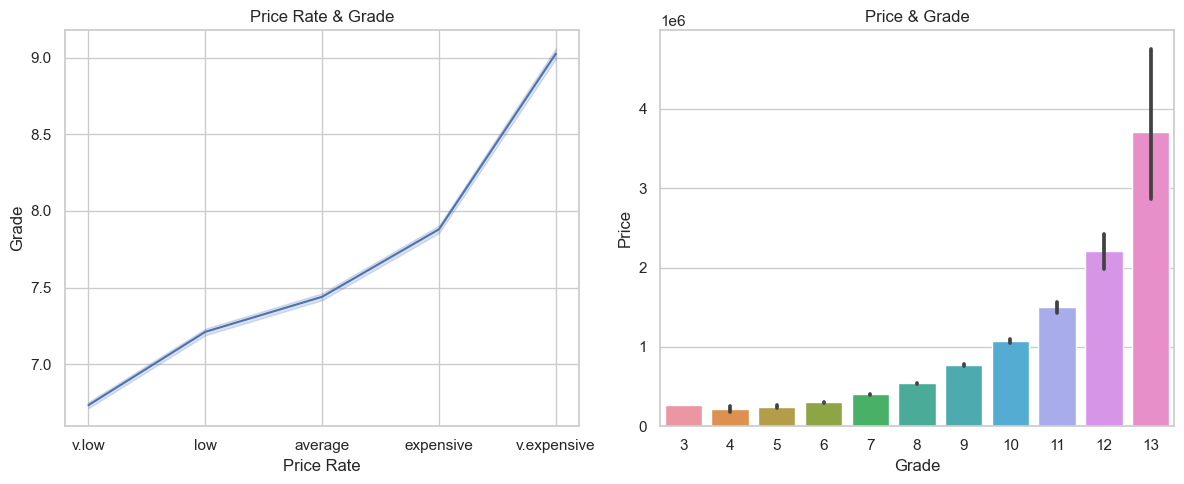

In [117]:
sns.set(style="whitegrid")

# Create a figure with two subplots side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the lineplot in the first subplot
sns.lineplot(x='price_level', y='grade', data=mah, ax=axes[0])
axes[0].set_title('Price Rate & Grade')
axes[0].set_xlabel('Price Rate')
axes[0].set_ylabel('Grade')

# Plot the barplot in the second subplot
sns.barplot(x='grade', y='price', data=mah, ax=axes[1])
axes[1].set_title('Price & Grade')
axes[1].set_xlabel('Grade')
axes[1].set_ylabel('Price')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


# Recommendations

In [129]:
jad.head(1)

,id,date,price,bedrooms,grade,zipcode,lat,long,year,month,liveliness,price_level
1,6414100192,2014-12-09,538000.000,3,7,98125,47.721,-122.319,2014,12,high,expensive


In [141]:
#filtering the data frame for only those three price levels 
desired_price_levels = ['low', 'average']
filtered_jad = jad[jad['price_level'].isin(desired_price_levels)]
filtered_jad[['id', 'zipcode', 'lat', 'long']]


,id,zipcode,lat,long
4,1954400510,98074,47.617,-122.045
9,3793500160,98038,47.368,-122.031
11,9212900260,98115,47.690,-122.292
13,6054650070,98074,47.613,-122.045
17,6865200140,98103,47.665,-122.343
...,...,...,...,...
21591,2997800021,98116,47.577,-122.409
21592,263000018,98103,47.699,-122.346
21594,1523300141,98144,47.594,-122.299
21595,291310100,98027,47.535,-122.069


In [131]:
# jad2 = jad[['zipcode', 'liveliness', 'lat', 'long', 'id', 'grade']]
# jad2

,zipcode,liveliness,lat,long,id,grade
1,98125,high,47.721,-122.319,6414100192,7
4,98074,high,47.617,-122.045,1954400510,8
5,98053,high,47.656,-122.005,7237550310,11
9,98038,v.high,47.368,-122.031,3793500160,7
11,98115,v.high,47.690,-122.292,9212900260,7
...,...,...,...,...,...,...
21591,98116,high,47.577,-122.409,2997800021,8
21592,98103,v.high,47.699,-122.346,263000018,8
21594,98144,high,47.594,-122.299,1523300141,7
21595,98027,high,47.535,-122.069,291310100,8
